In [5]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import graphviz # pip install

DATASET_DIR = os.path.join(os.path.dirname(os.getcwd()), 'DH practice')

red_file = os.path.join(DATASET_DIR, 'ML/winequality-red.csv')
white_file = os.path.join(DATASET_DIR, 'ML/winequality-white.csv')

In [7]:
wine_red = pd.read_csv(red_file, sep=';')
wine_white = pd.read_csv(white_file, sep=';')
wine_red.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


In [9]:

len(wine_red), len(wine_white)

(1599, 4898)

In [10]:
new_red = wine_red.copy()
new_red['is_red'] = 1
new_white = wine_white.copy()
new_white['is_red'] = 0

wine = new_red.append(new_white, ignore_index=True)

In [11]:

X = wine[['volatile acidity', 'sulphates']]
y = wine['is_red']

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
train_X, test_X, train_y, test_y = train_test_split(X, y, stratify=wine['is_red'], random_state=42)

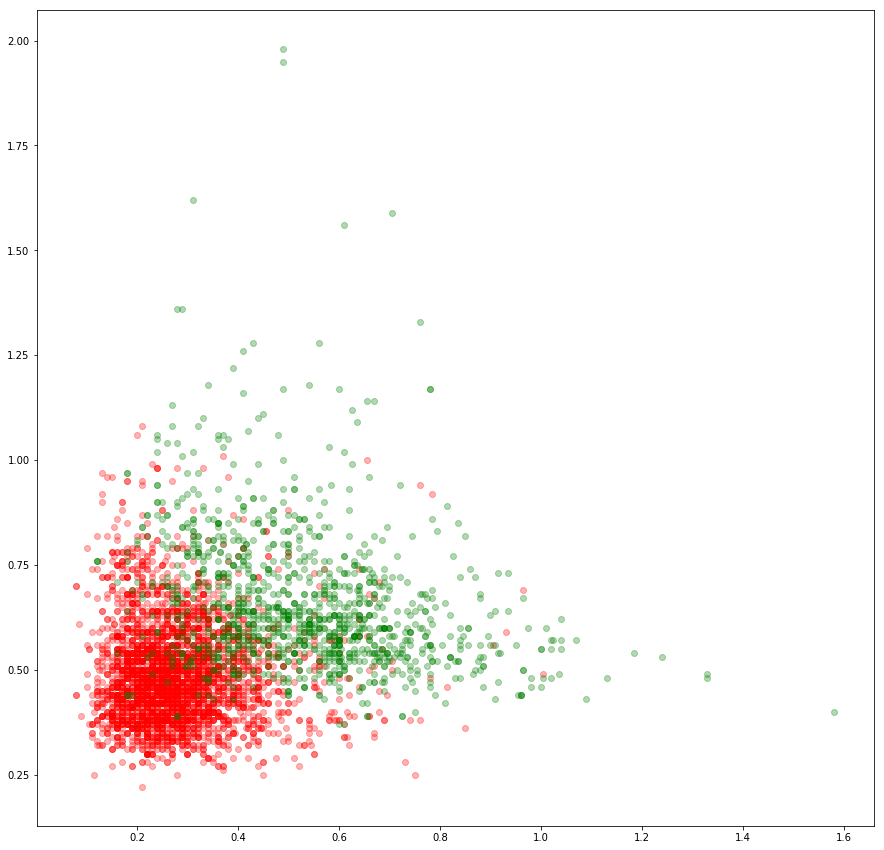

In [14]:
red_index = train_y[train_y==1].index
white_index = train_y[train_y==0].index
plt.figure(figsize=(15,15))
plt.scatter(x=train_X.loc[white_index, 'volatile acidity'], y=train_X.loc[white_index, 'sulphates'], color='r', alpha=0.3)

plt.scatter(x=train_X.loc[red_index, 'volatile acidity'], y=train_X.loc[red_index, 'sulphates'], color='g',  alpha=0.3)

plt.show()

In [15]:
import sys
sys.path.append

<function list.append(object, /)>

In [30]:
from sklearn import tree

"""
DecisionTreeClassifier(criterion=’gini’, splitter=’best’, max_depth=None, min_samples_split=2, min_samples_leaf=1, 
                       min_weight_fraction_leaf=0.0, max_features=None, max_leaf_nodes=None, 
                       min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)

# scikit-learn uses an optimised version of the CART algorithm.
                       
# criterion: entropy or gini
The function to measure the quality of a split. 
Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

# random_state: 난수값

# max_depth : int or None, optional (default=None)
The maximum depth of the tree. 
If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split sample

# min_samples_split: 분할 되기 위해 노드가 가져야 하는 최소 샘플 수 
# min_samples_leaf: 리프 노드가 가지고 있어야 할 최소 샘플 수
# max_leaf_nodes: 리프 노드의 최대 수
# max_features: 노드에서 분할에 사용할 특성의 최대 수
"""


clf = tree.DecisionTreeClassifier('entropy', max_depth=5)
clf.fit(train_X, train_y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

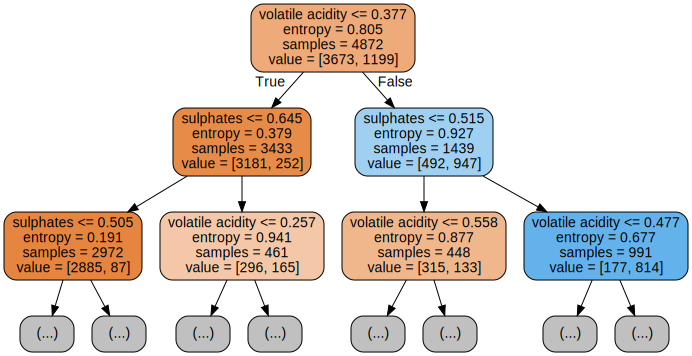

In [31]:
dot_data = tree.export_graphviz(
    clf, out_file=None, 
    max_depth=2, 
    feature_names=list(X.columns.values), 
    filled=True, rounded=True)
graphviz.Source(dot_data)

In [32]:
clf.classes_
# (white, red)


array([0, 1], dtype=int64)

In [33]:
# Returns the mean accuracy on the given test data and labels.
#depth를 증가시킬 때마다 예측률 증가
clf.score(train_X,train_y)



0.9205665024630542

In [34]:
clf.score(test_X, test_y)

0.9126153846153846

In [21]:
train_X.iloc[1]

volatile acidity    0.27
sulphates           0.42
Name: 5370, dtype: float64

In [24]:

# 
# (a, b) = (X_index, node_index)
m = clf.decision_path(train_X.iloc[:1])
print(m)

  (0, 0)	1
  (0, 1)	1
  (0, 3)	1


In [26]:
clf.predict(train_X.iloc[:1])

array([0], dtype=int64)

In [28]:
# Predict class log-probabilities of the input samples X.

clf.predict_log_proba(train_X)

array([[-0.44303859, -1.02745257],
       [-0.02971023, -3.53108229],
       [-0.02971023, -3.53108229],
       ...,
       [-0.02971023, -3.53108229],
       [-0.02971023, -3.53108229],
       [-0.02971023, -3.53108229]])

In [35]:
clf.predict(test_X)
# 1, 레드 , 0. 화이트

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [39]:
# Feature importance is calculated as the decrease in node impurity weighted by the probability of reaching that node. 
# The node probability can be calculated by the number of samples that reach the node, divided by the total number of samples. 
# The higher the value the more important the feature.

X.columns, clf.feature_importances_

(Index(['volatile acidity', 'sulphates'], dtype='object'),
 array([0.66358021, 0.33641979]))

In [42]:
clf.get_n_leaves()

AttributeError: 'DecisionTreeClassifier' object has no attribute 'get_n_leaves'

In [41]:
test_y[:3]

3128    0
4224    0
6431    0
Name: is_red, dtype: int64

# 파라미터 조정 # max_leaf_nodes

In [45]:
from sklearn import tree

"""
DecisionTreeClassifier(criterion=’gini’, splitter=’best’, max_depth=None, min_samples_split=2, min_samples_leaf=1, 
                       min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, 
                       min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)

# scikit-learn uses an optimised version of the CART algorithm.
                       
# criterion: entropy or gini
The function to measure the quality of a split. 
Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

# max_depth : int or None, optional (default=None)
The maximum depth of the tree. 
If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split sample

# min_samples_split: 분할 되기 위해 노드가 가져야 하는 최소 샘플 수 
# min_samples_leaf: 리프 노드가 가지고 있어야 할 최소 샘플 수
# max_leaf_nodes: 리프 노드의 최대 수
# max_features: 노드에서 분할에 사용할 특성의 최대 수
"""
clf = tree.DecisionTreeClassifier('entropy',  max_depth=3)

clf.fit(train_X, train_y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

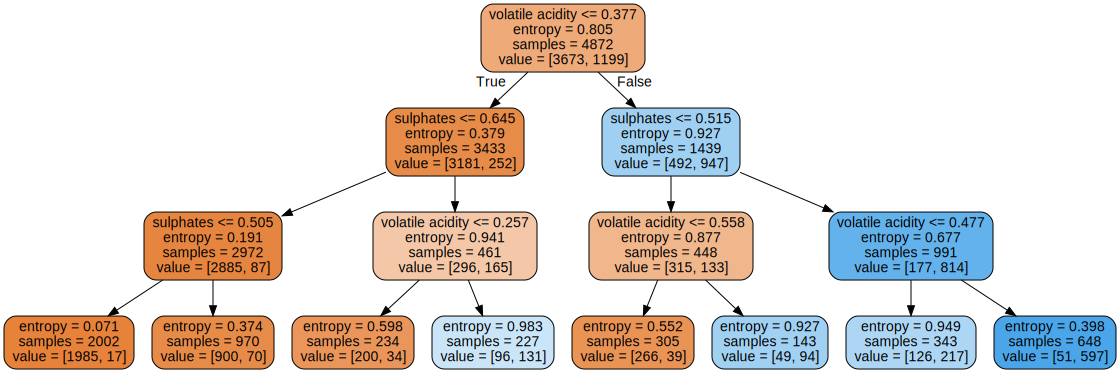

In [46]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                                max_depth=5, 
                                feature_names=list(X.columns.values), 
                                filled=True, 
                                rounded=True)
graphviz.Source(dot_data)

# 실습1: depth가 5이고 max_leaf_nodes가 10인 트리를 만들고 학습시키시오

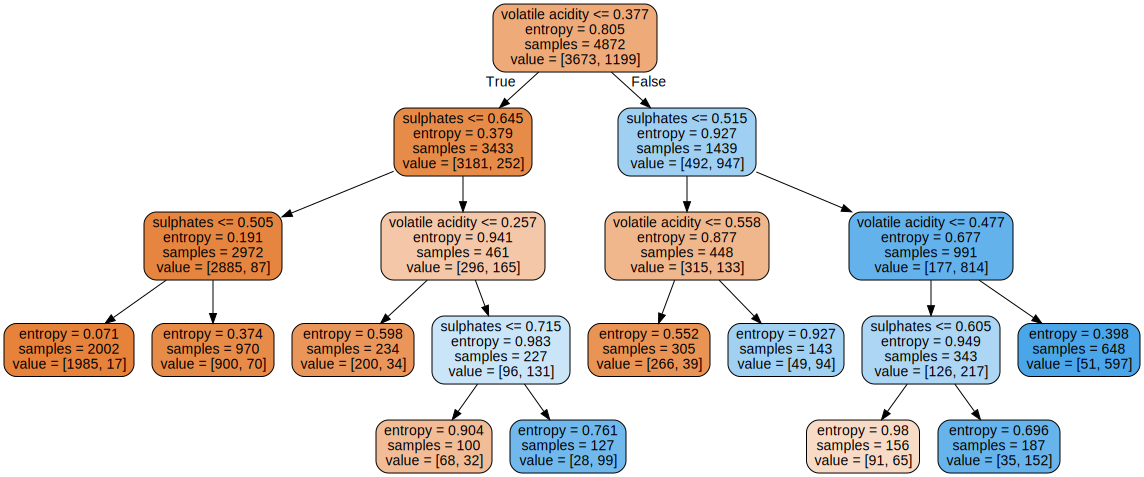

In [50]:
clf = tree.DecisionTreeClassifier('entropy',  max_depth=3, max_leaf_nodes = 10)

clf.fit(train_X, train_y)

dot_data = tree.export_graphviz(clf, out_file=None, 
                                max_depth=5, 
                                feature_names=list(X.columns.values), 
                                filled=True, 
                                rounded=True)
graphviz.Source(dot_data)

# 
Overfitting # 이전 예제에 비해 비교적

In [51]:
clf = tree.DecisionTreeClassifier('entropy')
clf.fit(train_X, train_y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [52]:
clf = tree.DecisionTreeClassifier('entropy')
clf.fit(train_X, train_y)
clf.score(test_X, test_y)

0.8966153846153846

In [67]:
clf = tree.DecisionTreeClassifier('entropy')
clf.fit(train_X, train_y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

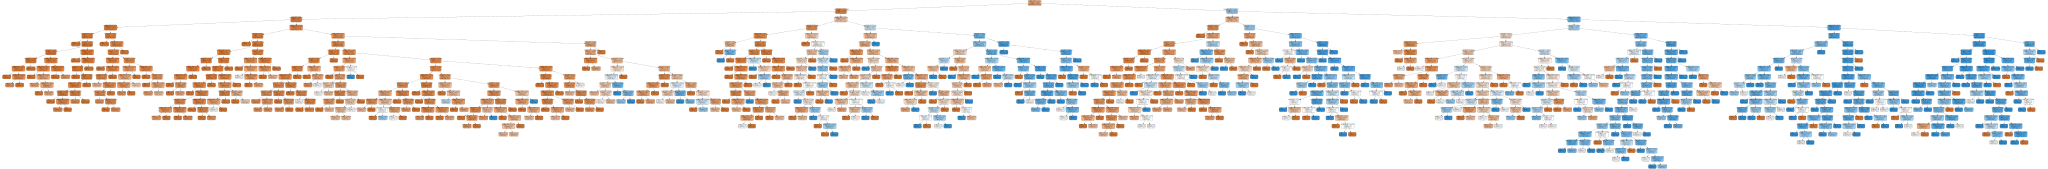

In [68]:
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=list(X.columns.values), filled=True, rounded=True)
graphviz.Source(dot_data)

In [61]:
clf.score(train_X, train_y)

0.8846469622331691

In [63]:
clf.score(test_X, test_y)

0.8898461538461538

In [65]:
clf.get_n_leaver()

AttributeError: 'DecisionTreeClassifier' object has no attribute 'get_n_leaver'

In [69]:
# max_depth, max_features
"""
descision_path 
= 어떤 데이터가 어떤 경로를 타고 어떤 leaf에 도착했는지 보여주는 메트릭스
-(Xdata index, node_id)
*node_id = decision tree에 마우스 커서 올려보면 숫자나옴

proba 
"""

SyntaxError: invalid syntax (<ipython-input-69-48dad12865d1>, line 1)

# 2. Feature: All, y= red or white

In [70]:

new_red = wine_red.copy()
new_red['is_red'] = 1
new_white = wine_white.copy()
new_white['is_red'] = 0

wine = new_red.append(new_white, ignore_index=True)

In [71]:
X = wine.drop('is_red', axis=1)
y = wine['is_red']

In [73]:
train_X, test_X, train_y, test_y = train_test_split(X, y, stratify=wine['is_red'], random_state=42, test_size = 0.2)

In [85]:
from sklearn import tree

"""
DecisionTreeClassifier(criterion=’gini’, splitter=’best’, max_depth=None, min_samples_split=2, min_samples_leaf=1, 
                       min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, 
                       min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)

# scikit-learn uses an optimised version of the CART algorithm.
                       
# criterion: entropy or gini
The function to measure the quality of a split. 
Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

# max_depth : int or None, optional (default=None)
The maximum depth of the tree. 
If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split sample

# random_state: 난수값

# min_samples_split: 분할 되기 위해 노드가 가져야 하는 최소 샘플 수 
# min_samples_leaf: 리프 노드가 가지고 있어야 할 최소 샘플 수
# max_leaf_nodes: 리프 노드의 최대 수
# max_features: 노드에서 분할에 사용할 특성의 최대 수 

# max_features : int, float, string or None, optional (default=”auto”)
The number of features to consider when looking for the best split:

If int, then consider max_features features at each split.
If float, then max_features is a fraction and int(max_features * n_features) features are considered at each split.
If “auto”, then max_features=sqrt(n_features).
If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).
If “log2”, then max_features=log2(n_features).
If None, then max_features=n_features.

"""
clf = tree.DecisionTreeClassifier('entropy', max_features = 3)

clf.fit(train_X, train_y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [86]:

clf.score(train_X, train_y)

0.9998075812969021

In [87]:

clf.score(test_X, test_y)

0.9838461538461538

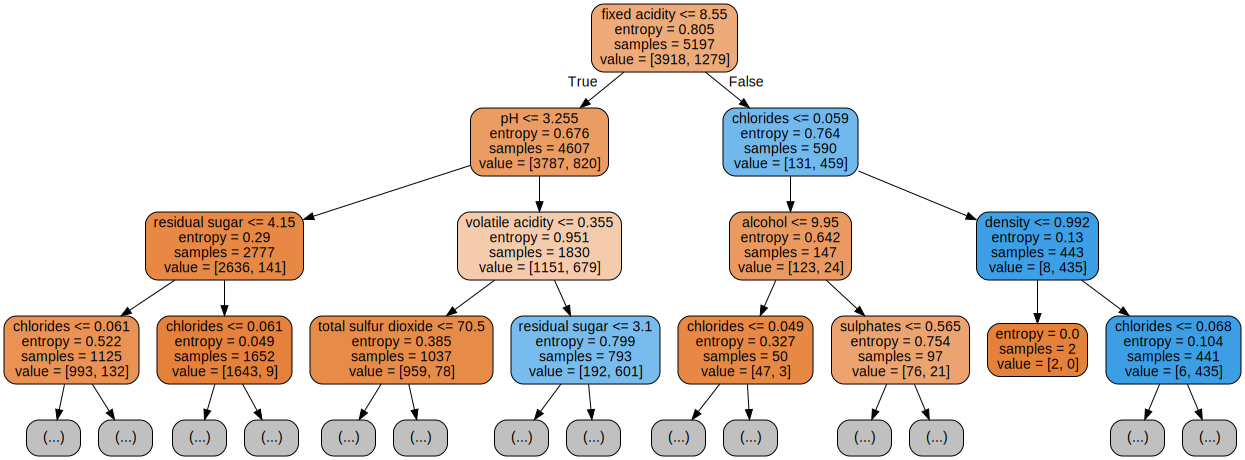

In [90]:
dot_data = tree.export_graphviz(clf, 
                                out_file=None, 
                                max_depth=3, 
                                feature_names=list(X.columns.values),
                                filled=True, 
                                rounded=True)
graphviz.Source(dot_data)

# 
3. Quality 예측

In [91]:

new_red = wine_red.copy()
new_white = wine_white.copy()
X = new_red.drop('quality', axis=1)
y = new_red['quality']
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, stratify=y, random_state=42, test_size=.2)

train_y.head()

1542    6
1558    5
344     6
924     5
971     6
Name: quality, dtype: int64

In [92]:
from sklearn import tree

"""
DecisionTreeClassifier(criterion=’gini’, splitter=’best’, max_depth=None, min_samples_split=2, min_samples_leaf=1, 
                       min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, 
                       min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)

# scikit-learn uses an optimised version of the CART algorithm.
                       
# criterion: entropy or gini
The function to measure the quality of a split. 
Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

# max_depth : int or None, optional (default=None)
The maximum depth of the tree. 
If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split sample

# random_state: 난수값

# min_samples_split: 분할 되기 위해 노드가 가져야 하는 최소 샘플 수 
# min_samples_leaf: 리프 노드가 가지고 있어야 할 최소 샘플 수
# max_leaf_nodes: 리프 노드의 최대 수
# max_features: 노드에서 분할에 사용할 특성의 최대 수 

# max_features : int, float, string or None, optional (default=”auto”)
The number of features to consider when looking for the best split:

If int, then consider max_features features at each split.
If float, then max_features is a fraction and int(max_features * n_features) features are considered at each split.
If “auto”, then max_features=sqrt(n_features).
If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).
If “log2”, then max_features=log2(n_features).
If None, then max_features=n_features.

"""
clf = tree.DecisionTreeClassifier('entropy', random_state=0)

clf.fit(train_X, train_y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [94]:
new_red['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

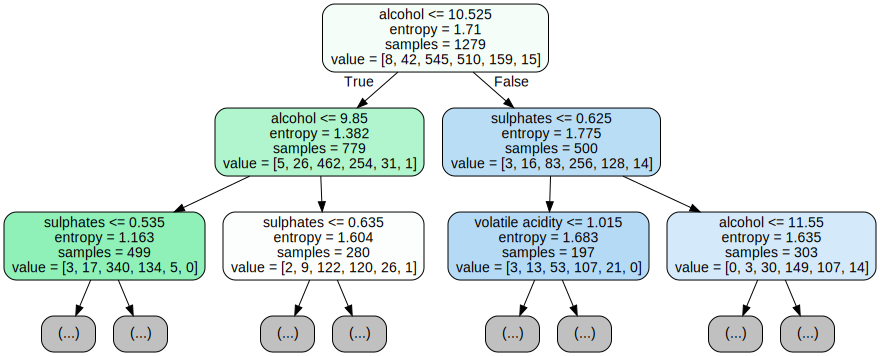

In [93]:
dot_data = tree.export_graphviz(clf, out_file=None, max_depth=2, feature_names=list(X.columns.values), filled=True, rounded=True)
graphviz.Source(dot_data)

# value 값들은 [3, 4, 5, 6, 7, 8]에 해당하는 probability

In [95]:
clf.score(train_X, train_y)

1.0

In [96]:
clf.score(test_X, test_y)

0.603125

In [97]:
# feature_importances_ 는 coef_와 같은 역할. weight.
list(zip(X.columns, clf.feature_importances_))

[('fixed acidity', 0.07391906181608769),
 ('volatile acidity', 0.11629849893284064),
 ('citric acid', 0.05788886494735533),
 ('residual sugar', 0.0784970064988638),
 ('chlorides', 0.05662613198027193),
 ('free sulfur dioxide', 0.04452005755686164),
 ('total sulfur dioxide', 0.09170644678797549),
 ('density', 0.04698259297918923),
 ('pH', 0.10408914337632276),
 ('sulphates', 0.11690231085845651),
 ('alcohol', 0.21256988426577506)]

In [100]:
clf.tree_

In [105]:
clf.tree_.n_features


11

In [109]:
clf.tree_.get_depth()

AttributeError: 'sklearn.tree._tree.Tree' object has no attribute 'get_depth'

# 실습1. white wine에 대해서 Quality 예측

In [121]:

new_white = wine_white.copy()


wine = new_red.append(new_white, ignore_index=True)

X = wine.drop('quality', axis=1)
y = wine['quality']

train_X, test_X, train_y, test_y = train_test_split(X, y, stratify=wine['quality'], random_state=42, test_size = 0.2)

from sklearn import tree

"""
DecisionTreeClassifier(criterion=’gini’, splitter=’best’, max_depth=None, min_samples_split=2, min_samples_leaf=1, 
                       min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, 
                       min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)

# scikit-learn uses an optimised version of the CART algorithm.
                       
# criterion: entropy or gini
The function to measure the quality of a split. 
Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

# max_depth : int or None, optional (default=None)
The maximum depth of the tree. 
If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split sample

# random_state: 난수값

# min_samples_split: 분할 되기 위해 노드가 가져야 하는 최소 샘플 수 
# min_samples_leaf: 리프 노드가 가지고 있어야 할 최소 샘플 수
# max_leaf_nodes: 리프 노드의 최대 수
# max_features: 노드에서 분할에 사용할 특성의 최대 수 

# max_features : int, float, string or None, optional (default=”auto”)
The number of features to consider when looking for the best split:

If int, then consider max_features features at each split.
If float, then max_features is a fraction and int(max_features * n_features) features are considered at each split.
If “auto”, then max_features=sqrt(n_features).
If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).
If “log2”, then max_features=log2(n_features).
If None, then max_features=n_features.

"""
clf = tree.DecisionTreeClassifier('entropy', max_features = 2)

clf.fit(train_X, train_y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

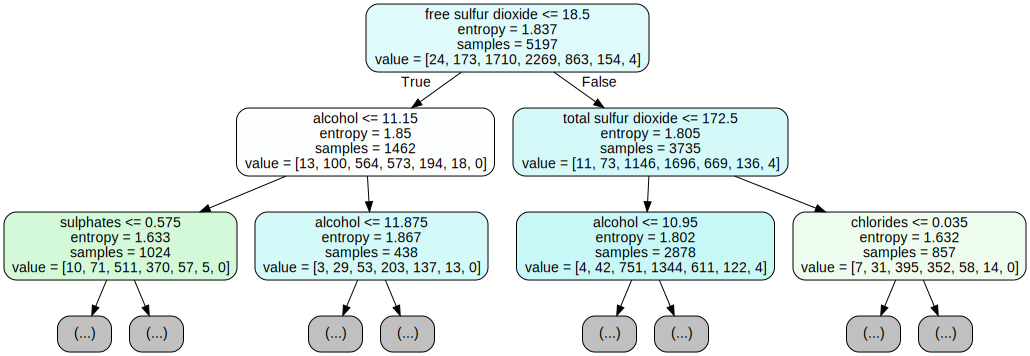

In [122]:
dot_data = tree.export_graphviz(clf, out_file=None, max_depth=2, feature_names=list(X.columns.values), filled=True, rounded=True)
graphviz.Source(dot_data)

In [123]:
clf.score(train_X, train_y)

1.0

In [120]:
clf.score(test_X, test_y)

0.4576923076923077

# 실습2. 전체 와인셋(red+ white)에 대해 quality 예측

In [137]:
new_red = wine_red.copy()
new_red['is_red'] = 1
new_white = wine_white.copy()
new_white['is_red'] = 0

wine = new_red.append(new_white, ignore_index=True)

X = wine.drop('quality', axis=1)
y = wine['quality']

train_X, test_X, train_y, test_y = train_test_split(X, y, stratify=y, random_state=42, test_size = 0.2)

from sklearn import tree

"""
DecisionTreeClassifier(criterion=’gini’, splitter=’best’, max_depth=None, min_samples_split=2, min_samples_leaf=1, 
                       min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, 
                       min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)

# scikit-learn uses an optimised version of the CART algorithm.
                       
# criterion: entropy or gini
The function to measure the quality of a split. 
Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

# max_depth : int or None, optional (default=None)
The maximum depth of the tree. 
If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split sample

# random_state: 난수값

# min_samples_split: 분할 되기 위해 노드가 가져야 하는 최소 샘플 수 
# min_samples_leaf: 리프 노드가 가지고 있어야 할 최소 샘플 수
# max_leaf_nodes: 리프 노드의 최대 수
# max_features: 노드에서 분할에 사용할 특성의 최대 수 

# max_features : int, float, string or None, optional (default=”auto”)
The number of features to consider when looking for the best split:

If int, then consider max_features features at each split.
If float, then max_features is a fraction and int(max_features * n_features) features are considered at each split.
If “auto”, then max_features=sqrt(n_features).
If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).
If “log2”, then max_features=log2(n_features).
If None, then max_features=n_features.

"""
clf = tree.DecisionTreeClassifier('entropy', random_state=0)

clf.fit(train_X, train_y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

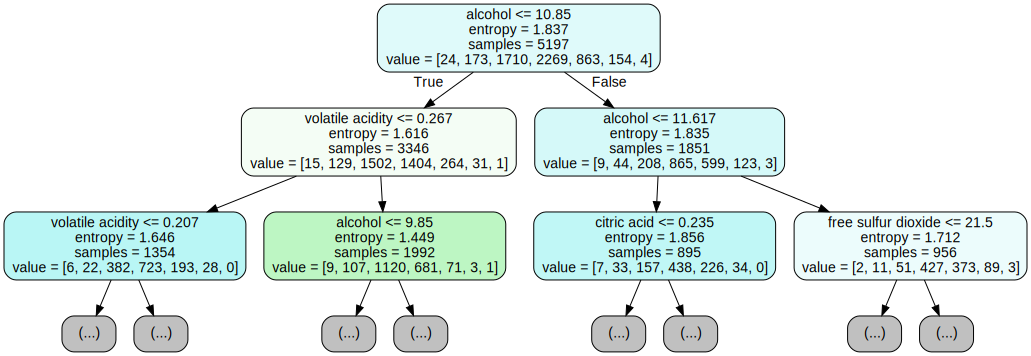

In [138]:
dot_data = tree.export_graphviz(clf, out_file=None, max_depth=2, feature_names=list(X.columns.values), filled=True, rounded=True)
graphviz.Source(dot_data)

In [139]:
clf.score(train_X, train_y)

1.0

In [140]:
clf.score(test_X, test_y)

0.6138461538461538

In [130]:
clf.classes_

array([3, 4, 5, 6, 7, 8, 9], dtype=int64)

array([5, 5, 5, ..., 6, 7, 6], dtype=int64)

# 

In [152]:
new_red = wine_red.copy()
new_red['is_red'] = 1
new_white = wine_white.copy()
new_white['is_red'] = 0

wine = new_red.append(new_white, ignore_index=True)

X = wine.drop('quality', axis=1)
y = wine['quality']

train_X, test_X, train_y, test_y = train_test_split(X, y, stratify=y, random_state=42, test_size = 0.2)

from sklearn import tree

"""
DecisionTreeClassifier(criterion=’gini’, splitter=’best’, max_depth=None, min_samples_split=2, min_samples_leaf=1, 
                       min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, 
                       min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)

# scikit-learn uses an optimised version of the CART algorithm.
                       
# criterion: entropy or gini
The function to measure the quality of a split. 
Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

# max_depth : int or None, optional (default=None)
The maximum depth of the tree. 
If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split sample

# random_state: 난수값

# min_samples_split: 분할 되기 위해 노드가 가져야 하는 최소 샘플 수 
# min_samples_leaf: 리프 노드가 가지고 있어야 할 최소 샘플 수
# max_leaf_nodes: 리프 노드의 최대 수
# max_features: 노드에서 분할에 사용할 특성의 최대 수 

# max_features : int, float, string or None, optional (default=”auto”)
The number of features to consider when looking for the best split:

If int, then consider max_features features at each split.
If float, then max_features is a fraction and int(max_features * n_features) features are considered at each split.
If “auto”, then max_features=sqrt(n_features).
If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).
If “log2”, then max_features=log2(n_features).
If None, then max_features=n_features.

"""
clf = tree.DecisionTreeClassifier('entropy', 
                                  random_state=0,
                                 max_features = 'auto'
                                 )
clf2 = tree.DecisionTreeClassifier('entropy',
                                   random_state=42,
                                   max_features=10)
clf3 = tree.DecisionTreeClassifier('entropy',
                                   random_state=42,
                                   max_features=10)
clf4 = tree.DecisionTreeClassifier('entropy',
                                   random_state=42,
                                   max_features=10)
clf5 = tree.DecisionTreeClassifier('entropy',
                                   random_state=42,
                                   max_features=10)
clf.fit(train_X, train_y)
clf2.fit(train_X, train_y)
clf3.fit(train_X, train_y)
clf4.fit(train_X, train_y)
clf5.fit(train_X, train_y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

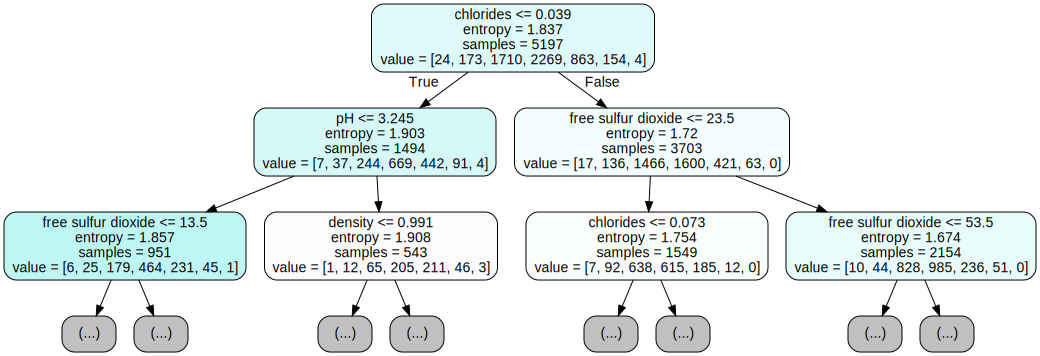

In [153]:
dot_data = tree.export_graphviz(clf, out_file=None, max_depth=2, feature_names=list(X.columns.values), filled=True, rounded=True)
graphviz.Source(dot_data)

In [158]:
print(clf.get_depth())
print(clf2.tree_.depth)
print(clf3.tree_.depth)
print(clf4.tree_.depth)
print(clf5.tree_.depth)

AttributeError: 'DecisionTreeClassifier' object has no attribute 'get_depth'